# More traditional statistics - one way F

In [1]:
# Import numerical, data and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Only show 6 decimals when printing
np.set_printoptions(precision=4)

In [2]:
%matplotlib inline

In [3]:
# The statistics library
from statsmodels.formula.api import ols

In [4]:
psychos = pd.read_csv('psycho_students.csv')
psychos

,psychopathy,clammy,university
0,11.416,0.389,Berkeley
1,4.514,0.200,Berkeley
2,12.204,0.241,Berkeley
3,14.835,0.463,Berkeley
4,8.416,4.585,Stanford
5,6.563,1.097,Stanford
6,17.343,1.642,Stanford
7,13.020,4.972,Stanford
8,15.190,7.957,MIT
9,11.902,5.585,MIT


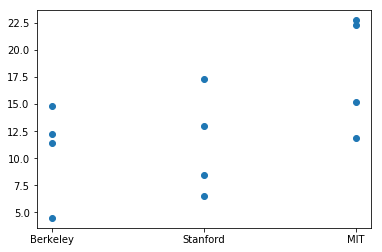

In [5]:
plt.scatter(psychos['university'], psychos['psychopathy'])

In [6]:
means = psychos.groupby('university').mean()
means

,psychopathy,clammy
university,,
Berkeley,10.74225,0.32325
MIT,18.03425,6.50825
Stanford,11.33550,3.07400


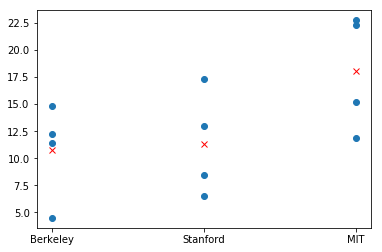

In [7]:
plt.scatter(psychos['university'], psychos['psychopathy'])
plt.plot(means.index, means.psychopathy, 'rx')

In [8]:
formula = 'psychopathy ~ university'
lm = ols(formula, psychos).fit()
lm.summary()

/Users/mb312/Library/Python/3.5/lib/python/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            psychopathy   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     2.753
Date:                Tue, 10 Apr 2018   Prob (F-statistic):              0.117
Time:                        22:45:30   Log-Likelihood:                -34.325
No. Observations:                  12   AIC:                             74.65
Df Residuals:                       9   BIC:                             76.11
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 10.7423      2.441      4.402      0.002       5.221      16.263
university[T.MIT]          7.2920      3.451      2.113      0.064      -0.516      15.100
university[T.Stanford]     0.5932      3.451      0.172      0.867      -7.214       8.401
==============================================================================
Omnibus:                        3.060   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.217   Jarque-Bera (JB):                1.088
Skew:                          -0.169   Prob(JB):                        0.580
Kurtosis:                       1.564   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$
\newcommand{Xmat}{\boldsymbol X}
$$
The F test needs a *full model* and a *reduced model*.  Call the full model $\Xmat_f$ and the reduced model $\Xmat_r$.  The formula for the F test is:

$$
F_{\nu_1, \nu_2} =
    \frac{
    (\textrm{SSR}(\Xmat_r) - \textrm{SSR}(\Xmat_f)) / \nu_1}
    {\textrm{SSR}(\Xmat_f) / \nu_2}
$$

where $\nu_1$ is called the *numerator degrees of freedom*, and $\nu_2$ is the *denominator degrees of freedom* or the *degrees of freedom of the error*.

$\nu_2$ is also the degrees of freedom for the full model.  $\nu_1$ is given by $d - \nu_2$ where $d$ is the degrees of freedom from the reduced model.